In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import re,string

import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [2]:
#importing the csv data 
real = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Portfolio Project\Python\Python_PredicitngRealorFakeNews_MachineLearning\True.csv')
fake = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Portfolio Project\Python\Python_PredicitngRealorFakeNews_MachineLearning\Fake.csv')

## Checking of Imported Datasets

In [3]:
#checking real news dataset
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
#checking fake news dataset
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
#checking of null values for real news dataset, there are no null values
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
#checking of null values for fake news dataset, there are no null values
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Data Cleaning

### Removing of duplicates in both data sets

In [7]:
#checking the duplicates in the real news data set
real_duplicates = real[real.duplicated()]
real_duplicates

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [8]:
#droppping the duplicates in the real news data set
real = real.drop_duplicates(keep='first')

In [9]:
#checking the duplicates in the fake news data set
fake_duplicates = fake[fake.duplicated()]
fake_duplicates

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [10]:
#droppping the duplicates in the fake news data set
fake = fake.drop_duplicates(keep='first')

In [11]:
#assigning the a new column into both data sets to distinguish real or fake news when the data sets are appended later
#real news will have value of 1 under reliable column
#fake news will have value of  0 under reliable column
pd.options.mode.chained_assignment = None
real['reliable'] = 1
fake['reliable'] = 0

### Appending the datasets together and dropping columns

In [12]:
#appending the fake news data set with the real news data set into one and naming the dataset as df
df = real.append(fake)
df

,title,text,subject,date,reliable
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [13]:
#creating a corpus by including the title into the text column 
df['text'] = df['title'] + ' ' + df['text']
df

,title,text,subject,date,reliable
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,McPain: John McCain Furious That Iran Treated ...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,How to Blow $700 Million: Al Jazeera America F...,Middle-east,"January 14, 2016",0


In [14]:
#dropping title,subject and date column as we are solely focusing predicting the news to be real or fake through the text
df = df.drop(['title','subject','date'],axis=1)
df

,text,reliable
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [15]:
pd.options.display.max_colwidth = 1000
df

,text,reliable
0,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for ...",1
1,"U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in Distri...",1
2,"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.” The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has lo...",1
3,"FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly go

### Text Preprocessing

In [16]:
#creating functions to clean the text column

#lower casing the text column 
def lower_case(text):
    text_lowercase = text.lower()
    return text_lowercase

#removing punctuation and leaving onlyalphanumeric words and whitespace
def remove_punct(text):
    text_without_punct = re.sub('[^\w\s]', '' , text)
    return text_without_punct

#removing stop words from the nktl library
def remove_stopwords(text):
    CachedStopWords = stopwords.words('english')
    text_tokens = word_tokenize(text)
    text_without_stopwords = [word for word in text_tokens if not word in CachedStopWords]
    return ' '.join(text_without_stopwords)

#compiling all the text cleaning functions into one function
def cleaning_text(text):
    text = lower_case(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    return text

#putting the text column into the text cleaning function
df['text'] = df['text'].apply(cleaning_text)
df

,text,reliable
0,us budget fight looms republicans flip fiscal script washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending 7 percent meadows chairman small influen...,1
1,us military accept transgender recruits monday pentagon washington reuters transgender people allowed first time enlist us military starting monday ordered federal courts pentagon said friday president donald trumps administration decided appeal rulings blocked transgender ban two federal appeals courts one washington one virginia last week rejected administrations request put hold orders lower court judges requiring military begin accepting transgender recruits jan 1 justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks rather litigate interim appeal occurs administration decided wait dods study continue defend presidents lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department feb 21 submit plan trump lawyers representing...,1
2,senior us republican senator let mr mueller job washington reuters special counsel investigation links russia president trumps 2016 election campaign continue without interference 2018 despite calls trump administration allies republican lawmakers shut prominent republican senator said sunday lindsey graham serves senate armed forces judiciary committees said department justice special counsel robert mueller needs carry russia investigation without political interference investigation go forward investigation conducted without political influence graham said cbss face nation news program need let mr mueller job think hes right guy right time question russia may interfered election trumps campaign may links coordinated effort loomed white house since trump took office january shows sign receding trump prepares second year power despite intensified rhetoric trump allies recent weeks accusing muellers team bias republican president trump seemed undercut supporters interview last week ...,1
3,fbi russia probe helped australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told australian diplomat may 2016 russia political dirt democratic presidential candidate hillary clinton new york times reported saturday conversation papadopoulos diplomat alexander downer london driving factor behind fbis decision open counterintelligence investigation moscows contacts trump campaign times reported two months meeting australian officials passed information came papadopoulos american counterparts leaked democratic emails began appearing online according newspaper cited four current former us foreign officials besides information australians probe federal bureau investigation also propelled intelligence friendly governments including british dutch times said papadopoulos chicagobased international energy lawyer pleaded guilty oct 30 lying fbi agents contacts people claimed ties top russian officials first criminal charge all

## Generated WordCloud from cleaned text 

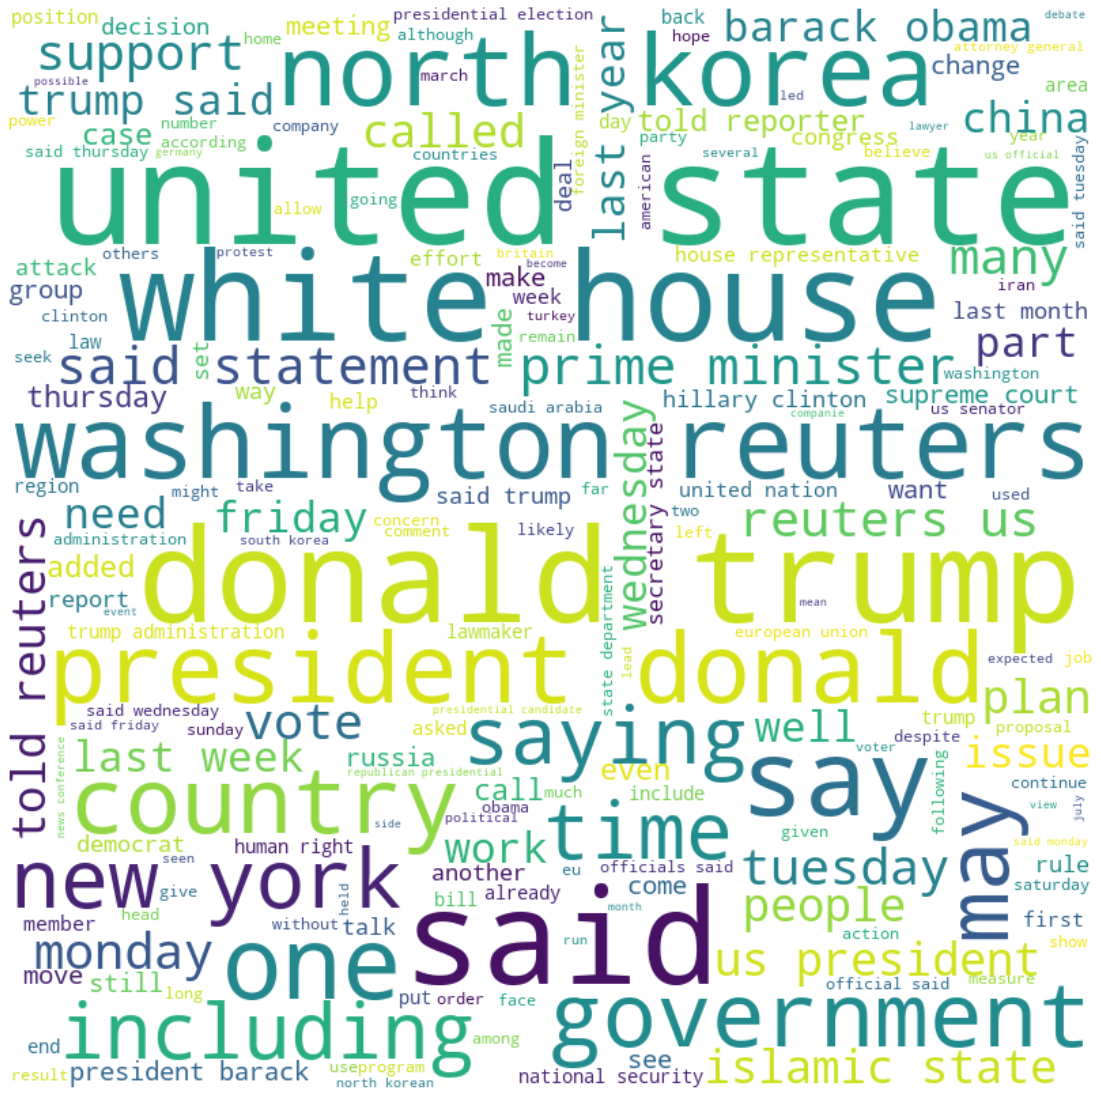

In [17]:
#wordcloud for the real news sources
plt.figure(figsize=(20,20))
wc = WordCloud(background_color='white',stopwords=STOPWORDS,height=800,width=800)
wc.generate(" ".join(df[df.reliable == 1].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


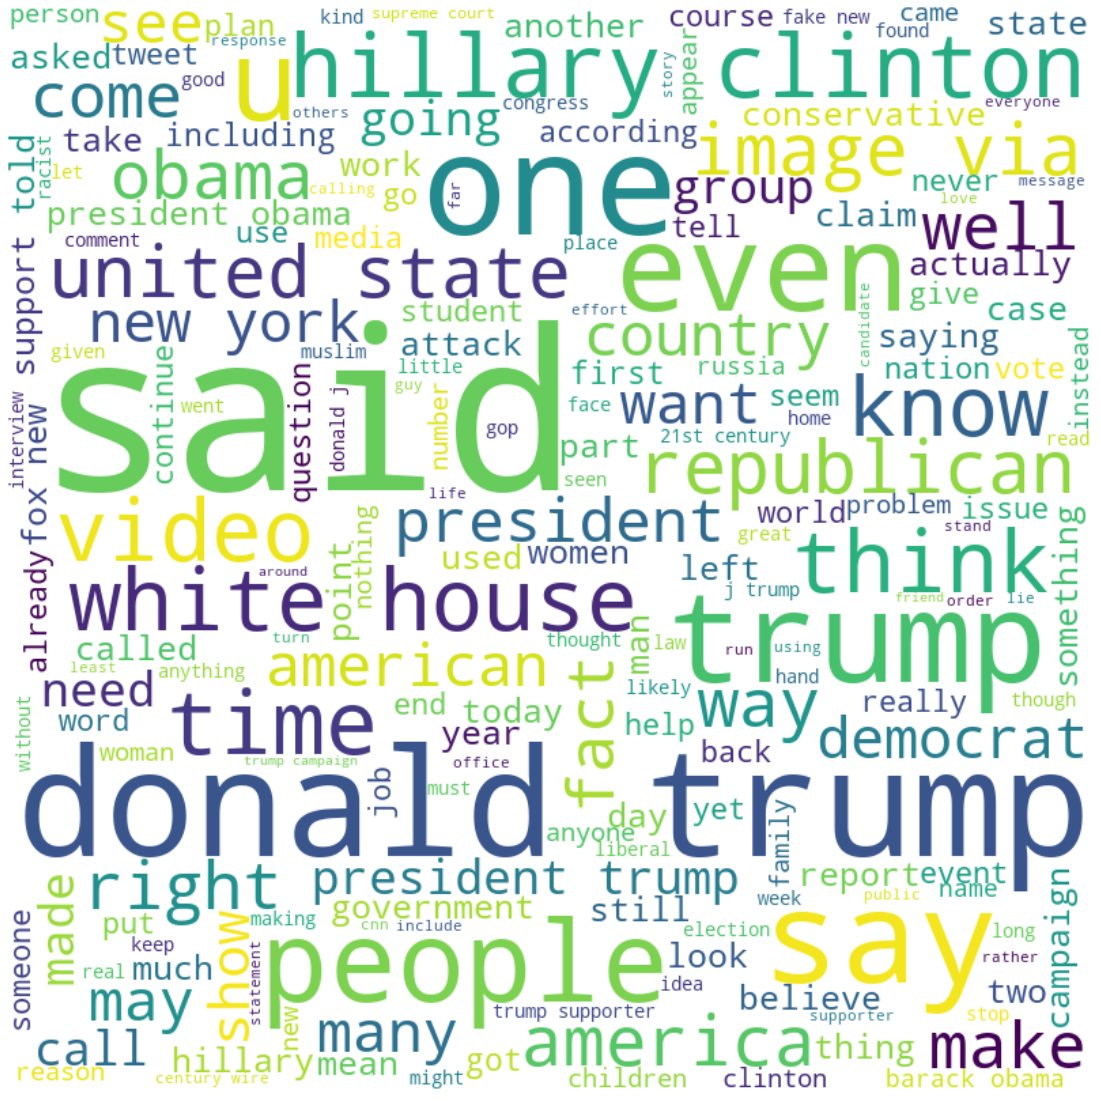

In [18]:
#wordcloud for the fake news sources
plt.figure(figsize=(20,20))
wc = WordCloud(background_color='white',stopwords=STOPWORDS,height=800,width=800)
wc.generate(" ".join(df[df.reliable == 0].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


## Modelling 

### TF-IDF Vectorizor

In [19]:
#term frequency-inverse document frequency(tf-idf) is used to evaluate the relevancy of the word is to a document in a collection of document
#number is computed by multiplying: 1) how many times a word appears in a document 2)inverse document frequency of the word across a document
#useful for scoring words in ml algorithms for NLP
tfidf = TfidfVectorizer()

In [20]:
#splitting the data into training data and test data
x=df['text']
y=df['reliable']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [21]:
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

### Multinomial Naive Bayes 

In [22]:
#pluuging the tf-idf vectorized text into multinomial naive bayes model
mnb = MultinomialNB()
mnb_tfidf = mnb.fit(tfidf_train, y_train)
mnb_tfidf_predict=mnb.predict(tfidf_test)

In [23]:
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict)
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4713
           1       0.94      0.95      0.94      4225

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



### Support Vector Classifier

In [24]:
svc = LinearSVC() 
svc_tfidf = svc.fit(tfidf_train, y_train)
svc_tfidf_predict=svc.predict(tfidf_test)

In [25]:
svc_tfidf_report = classification_report(y_test, svc_tfidf_predict)
print(svc_tfidf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4713
           1       1.00      1.00      1.00      4225

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



### Comparing between Multinomial Naive Bayes and Support Vector Classifier prediction precision, Support Vector Classifier is better at predicting real or fake news in the subject areas present in the data set. 